# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp
import numpy as np
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split

# Lendo Base

In [102]:
a

,date,bank,product,production
0,2025-01-01,97,88011,0.0
1,2025-01-01,97,91108,0.0
2,2025-01-01,97,31043,0.0
3,2025-01-01,97,77090,0.0
4,2025-01-01,97,23237,0.0
...,...,...,...,...
66435091,2025-09-23,167,64251,0.0
66435092,2025-09-23,167,30636,0.0
66435093,2025-09-23,167,92490,0.0
66435094,2025-09-23,167,137599,0.0


In [98]:
df = pd.read_excel('C://Users//joaov//OneDrive//Área de Trabalho//Python//lev-challenge//data//raw//PRODUCTIONS.xlsx')
df

,date,bank,product,production
0,2025-01-30,97,88011,42991.29
1,2025-04-07,185,91108,1540.97
2,2025-05-08,46,31043,11820.76
3,2025-02-05,46,77090,1308.11
4,2025-01-30,243,23237,4954.00
...,...,...,...,...
87363,2025-05-27,62,14910,2355.01
87364,2025-04-15,208,28475,8499.74
87365,2025-05-29,28,63829,59888.80
87366,2025-06-04,270,65281,315.08


In [46]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# EDA

- [X] Dia da Semana
- [X] Mês
- [ ] Fim do Mês/Inicio de Mês
- [ ] Quinzena
- [ ] Final de Semana
- [ ] Lags
- [ ] Média Móvel
- [ ] Desvio Padrão Móvel
- [ ] Feriado
- [ ] Trend
- [ ] Diff média de production por banco, produto e banco/produto
- [ ] Ratio média de production por banco, produto e banco/produto

## Info Básicas

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87368 entries, 0 to 87367
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        87368 non-null  datetime64[ns]
 1   bank        87368 non-null  int64         
 2   product     87368 non-null  int64         
 3   production  87368 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 2.7 MB


In [6]:
df.describe()

,date,bank,product,production
count,87368,87368.000000,87368.000000,8.736800e+04
mean,2025-05-15 20:24:35.798919424,150.485029,56816.404542,4.819659e+04
min,2025-01-01 00:00:00,2.000000,5.000000,-6.579374e+04
25%,2025-03-12 00:00:00,72.000000,24432.000000,1.653928e+03
50%,2025-05-16 00:00:00,132.000000,64104.000000,5.584370e+03
75%,2025-07-21 00:00:00,208.000000,87993.000000,2.009764e+04
max,2025-09-23 00:00:00,295.000000,137949.000000,2.210837e+07
std,NaN,82.228222,35441.778327,2.652941e+05


In [48]:
df.shape

(87368, 4)

### Range dos Dados

In [11]:
df['date'].min(), df['date'].max()

(Timestamp('2025-01-01 00:00:00'), Timestamp('2025-09-23 00:00:00'))

### Granularidade

In [ ]:
df['bank'].nunique()

52

In [16]:
df['product'].nunique()

4803

### Missing Data

In [ ]:
df[df['production'] < 0]

,date,bank,product,production,key_bank_product
33899,2025-07-04,208,125684,-2163.62,208125684
37568,2025-02-18,262,87133,-23676.45,26287133
41195,2025-06-27,225,92634,-14975.85,22592634
85200,2025-08-04,225,92026,-8214.42,22592026
85438,2025-04-10,282,8398,-65793.74,2828398


In [49]:
df[df['production'] == 0]

,date,bank,product,production
24,2025-05-19,249,63942,0.0
107,2025-04-02,62,79074,0.0
118,2025-04-09,62,3139,0.0
136,2025-02-11,62,62578,0.0
170,2025-05-20,249,87423,0.0
...,...,...,...,...
87272,2025-08-05,282,11404,0.0
87277,2025-04-28,20,86884,0.0
87303,2025-07-18,97,29245,0.0
87344,2025-05-09,249,87184,0.0


## Análise de Volume de Produção

In [88]:
group_bank = df.groupby('bank').agg({'production': 'sum'}).sort_values(by='production', ascending=False).reset_index()
group_bank['percentual'] = group_bank['production'] / group_bank['production'].sum() * 100
group_bank

,bank,production,percentual
0,185,8.947790e+08,21.249422
1,28,8.071402e+08,19.168154
2,208,5.078655e+08,12.060909
3,290,3.358483e+08,7.975803
4,109,2.795081e+08,6.637825
5,132,2.254027e+08,5.352916
6,282,2.170110e+08,5.153627
7,53,1.327742e+08,3.153152
8,62,1.178583e+08,2.798927
9,97,8.132177e+07,1.931248


In [93]:
group_bank[group_bank['production']<=0]

,bank,production,percentual
51,146,0.0,0.0


**Existe um banco que não produziu nada ao longo do ano**

In [89]:
group_product = df.groupby('product').agg({'production': 'sum'}).sort_values(by='production', ascending=False).reset_index()
group_product['percentual'] = group_product['production'] / group_product['production'].sum() * 100
group_product

,product,production,percentual
0,7892,4.989760e+08,11.849800
1,29849,4.329596e+08,10.282027
2,63829,1.658877e+08,3.939539
3,24069,1.535782e+08,3.647212
4,67,1.340178e+08,3.182685
...,...,...,...
4798,36558,0.000000e+00,0.000000
4799,36541,0.000000e+00,0.000000
4800,64242,0.000000e+00,0.000000
4801,36351,0.000000e+00,0.000000


In [92]:
group_product[group_product['production']<=0]

,product,production,percentual
4632,92506,0.00,0.000000
4633,62343,0.00,0.000000
4634,62577,0.00,0.000000
4635,62354,0.00,0.000000
4636,20073,0.00,0.000000
...,...,...,...
4798,36558,0.00,0.000000
4799,36541,0.00,0.000000
4800,64242,0.00,0.000000
4801,36351,0.00,0.000000


**Existe um produto com produção negativa**

# Visualizações

## Análise Temporal

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def analyze_temporal_data(df):
    """
    Análise temporal para dados de produção
    Args:
        df: DataFrame com 'date', 'bank', 'product', 'production'
    """
    # Preparar dados
    df = df.sort_values('date')
    
    print("="*50)
    print("ANÁLISE TEMPORAL")
    print("="*50)
    
    # 1. FREQUÊNCIA
    print("1. FREQUÊNCIA DOS DADOS")
    min_date = df['date'].min()
    max_date = df['date'].max()
    total_days = (max_date - min_date).days + 1
    unique_dates = df['date'].nunique()
    
    print(f"Período: {min_date.date()} a {max_date.date()}")
    print(f"Dias com dados: {unique_dates} de {total_days} ({unique_dates/total_days:.1%})")
    
    # 2. GAPS TEMPORAIS
    print(f"\n2. GAPS TEMPORAIS")
    all_dates = pd.date_range(min_date, max_date, freq='D')
    missing_dates = set(all_dates) - set(df['date'])
    
    print(f"Dias faltantes: {len(missing_dates)}")
    if len(missing_dates) > 0:
        weekend_missing = sum(1 for d in missing_dates if d.weekday() >= 5)
        print(f"Finais de semana faltantes: {weekend_missing} ({weekend_missing/len(missing_dates):.1%})")
        
        missing_sample = sorted(list(missing_dates))[:5]
        print(f"Primeiros dias faltantes: {[d.strftime('%Y-%m-%d (%a)') for d in missing_sample]}")
    
    # 3. TENDÊNCIA GERAL
    print(f"\n3. TENDÊNCIA GERAL")
    daily_production = df.groupby('date')['production'].sum()
    
    # Estatísticas básicas
    print(f"Produção média/dia: {daily_production.mean():.0f}")
    print(f"Primeiro vs último mês:")
    
    first_month = daily_production.iloc[:30].mean()
    last_month = daily_production.iloc[-30:].mean()
    change = ((last_month / first_month) - 1) * 100
    
    print(f"  Início: {first_month:.0f}")
    print(f"  Fim: {last_month:.0f}")
    print(f"  Mudança: {change:+.1f}%")
    
    # Tendência
    days_from_start = (daily_production.index - daily_production.index[0]).days
    slope = np.polyfit(days_from_start, daily_production.values, 1)[0]
    
    if slope > 1:
        trend = "CRESCENTE"
    elif slope < -1:
        trend = "DECRESCENTE"  
    else:
        trend = "ESTÁVEL"

    print(f"Tendência: {trend} ({slope:+.2f}/dia)")
    
    # GRÁFICO
    plt.figure(figsize=(12, 6))
    
    # Subplot 1: Série temporal
    plt.subplot(1, 2, 1)
    plt.plot(daily_production.index, daily_production.values, alpha=0.7)
    plt.plot(daily_production.index, np.poly1d(np.polyfit(days_from_start, daily_production.values, 1))(days_from_start), 
             '--', color='red', label='Tendência')
    plt.title('Produção Diária Total')
    plt.xlabel('Data')
    plt.ylabel('Produção')
    plt.legend()
    plt.xticks(rotation=45)
    
    # Subplot 2: Dias da semana
    plt.subplot(1, 2, 2)
    df['month'] = df['date'].dt.month
    month_avg = df.groupby('month')['production'].mean()

    plt.bar(range(df['month'].min(), df['month'].max() + 1), month_avg.values)
    plt.title('Produção Média por Mês')
    plt.xlabel('Mês')
    plt.ylabel('Produção Média')
    plt.xticks(range(df['month'].min(), df['month'].max() + 1), range(df['month'].min(), df['month'].max() + 1))

    plt.tight_layout()
    plt.show()
    
    return {
        'coverage': unique_dates/total_days,
        'missing_days': len(missing_dates),
        'trend_slope': slope,
        'avg_production': daily_production.mean()
    }

ANÁLISE TEMPORAL
1. FREQUÊNCIA DOS DADOS
Período: 2025-01-01 a 2025-09-23
Dias com dados: 266 de 266 (100.0%)

2. GAPS TEMPORAIS
Dias faltantes: 0

3. TENDÊNCIA GERAL
Produção média/dia: 15830223
Primeiro vs último mês:
  Início: 19614755
  Fim: 14978290
  Mudança: -23.6%
Tendência: DECRESCENTE (-34741.14/dia)


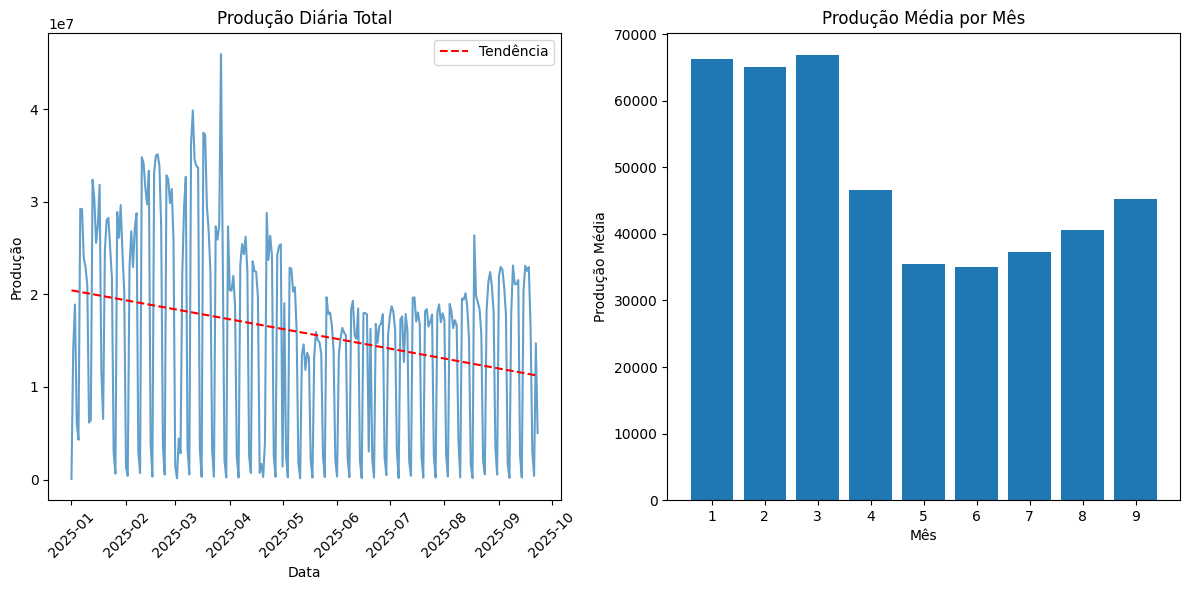

{'coverage': 1.0,
 'missing_days': 0,
 'trend_slope': np.float64(-34741.13834549174),
 'avg_production': np.float64(15830222.721390976)}

In [ ]:
analyze_temporal_data(df)

## Sazonalidade por Dia da Semana

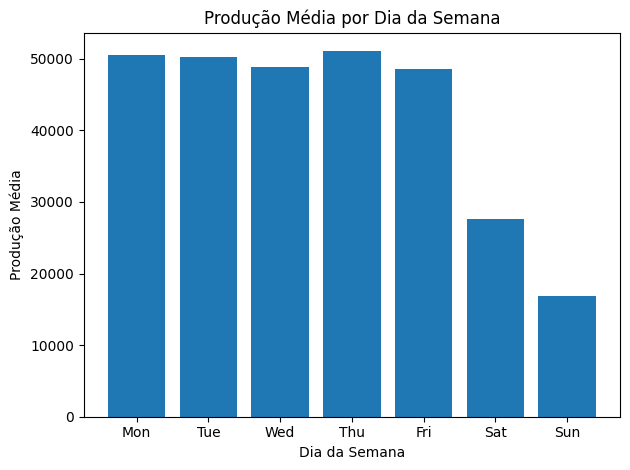

In [80]:
df['weekday'] = df['date'].dt.day_name()
weekday_avg = df.groupby('weekday')['production'].mean()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_avg = weekday_avg.reindex(weekday_order).fillna(0)

plt.bar(range(7), weekday_avg.values)
plt.title('Produção Média por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Produção Média')
plt.xticks(range(7), [d[:3] for d in weekday_order])

plt.tight_layout()
plt.show()